# Asigment 2


## Task 1
### Data Prepatation and Analysis


In [1]:
import numpy as np
import pandas as pd

# Read the data set

df = pd.read_csv('A2data.csv',delimiter=";")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# Review dataset

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45,170,1.001,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14,132,0.994,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6


### Clean Data

In [3]:
#Check dataset DataType
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar           object
chlorides               float64
free sulfur dioxide      object
total sulfur dioxide     object
density                  object
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [4]:
# Convert non-numerical column to NaN

columns_to_convert = ['residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'density']

for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Verify the data types after conversion
print(df.dtypes)


fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


## Task 1.1
### Take random 600 null free instances from data set


In [5]:
# Check for missing value

missing_values = df.isnull().any(axis=1)


# Remove missing instances with missing values

df = df[~missing_values]

# Check if there are enough 600 instances
if len(df) >= 600:
    df = df.sample(n=600, random_state=42)
    print(df)
else:
    print("There are not enough 600 instances")
    


      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1593            7.5              0.19         0.49             1.6      0.047   
3192            6.6              0.16         0.34             1.1      0.037   
545             6.7              0.21         0.42             9.1      0.049   
2663            7.0              0.16         0.36             2.6      0.029   
4453            6.4              0.24         0.27             1.5      0.040   
...             ...               ...          ...             ...        ...   
1405            7.4              0.25         0.49             1.1      0.042   
4242            5.7              0.22         0.20            16.0      0.044   
4129            7.4              0.16         0.30            13.7      0.056   
2136            7.4              0.18         0.27             1.3      0.048   
1842            7.1              0.25         0.30             2.4      0.042   

      free sulfur dioxide  

In [6]:
df


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1593,7.5,0.19,0.49,1.6,0.047,42.0,140.0,0.99320,3.40,0.47,10.7,6
3192,6.6,0.16,0.34,1.1,0.037,41.0,115.0,0.98990,3.01,0.68,12.0,6
545,6.7,0.21,0.42,9.1,0.049,31.0,150.0,0.99530,3.12,0.74,9.9,7
2663,7.0,0.16,0.36,2.6,0.029,28.0,98.0,0.99126,3.11,0.37,11.2,7
4453,6.4,0.24,0.27,1.5,0.040,35.0,105.0,0.98914,3.13,0.30,12.4,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1405,7.4,0.25,0.49,1.1,0.042,35.0,156.0,0.99170,3.13,0.55,11.3,5
4242,5.7,0.22,0.20,16.0,0.044,41.0,113.0,0.99862,3.22,0.46,8.9,6
4129,7.4,0.16,0.30,13.7,0.056,33.0,168.0,0.99825,2.90,0.44,8.7,7
2136,7.4,0.18,0.27,1.3,0.048,26.0,105.0,0.99400,3.52,0.66,10.6,6


In [7]:
print(df['density'].dtype)

float64


### Verify the Dataset


In [8]:
# Check for missing values in each row
missing_rows = df.isnull().any(axis=1)

# Check if there are any rows with missing values
if missing_rows.any():
    print("There are rows with missing values.")
else:
    print("There are no rows with missing values.")

There are no rows with missing values.


## Task 1.2
### Explore the relationship between two variables: alcohol and density.

In [9]:
density_min = round(df['density'].min(), 2)
density_max = round(df['density'].max(), 2)


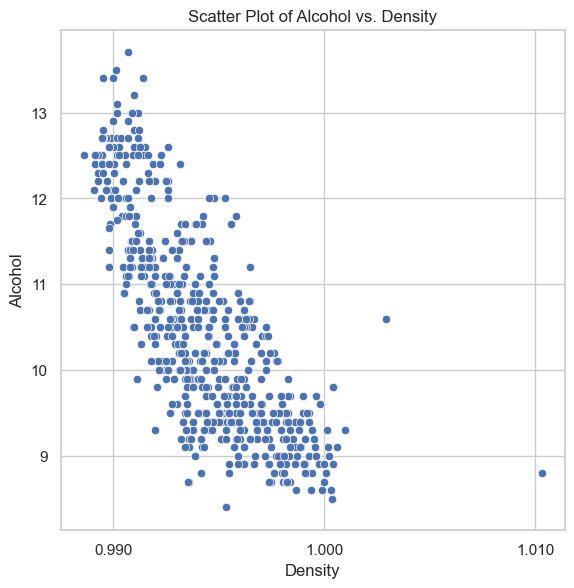

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Set the theme for the plot

sns.set_theme(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(6.5, 6.5))
ax = sns.scatterplot(x="density", y="alcohol", data=df)

plt.title('Scatter Plot of Alcohol vs. Density')
plt.xlabel('Density')
plt.ylabel('Alcohol')

# Define a custom tick formatting function for the x-axis (density axis)
def format_density_ticks(x, pos):
    return '{:.3f}'.format(x)  # Format the tick label to three decimal places

# Apply the custom tick formatter to the x-axis (density axis)
ax.xaxis.set_major_formatter(FuncFormatter(format_density_ticks))

# Set the x-axis ticks explicitly
density_ticks = np.arange(density_min, density_max, step=0.01)
ax.set_xticks(density_ticks)

# Show the plot
plt.show()

### Build Linear Model

In [11]:
from sklearn.linear_model import LinearRegression
import numpy as np

model = LinearRegression()

X = df['density'].values  # Convert the Series to a numpy array
y = df['alcohol']

# Reshape X to 2D array
X = X.reshape(-1, 1)

# Fit the model to the data
model.fit(X, y)


LinearRegression()

In [12]:
# Predict y values based on the model
y_pred = model.predict(X)


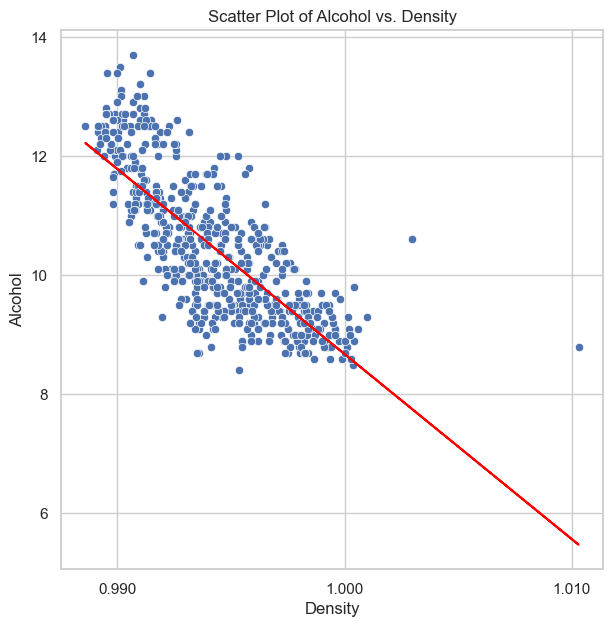

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Set the theme for the plot

sns.set_theme(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(7, 7))
ax = sns.scatterplot(x="density", y="alcohol", data=df)

plt.title('Scatter Plot of Alcohol vs. Density')
plt.xlabel('Density')
plt.ylabel('Alcohol')

# Define a custom tick formatting function for the x-axis (density axis)
def format_density_ticks(x, pos):
    return '{:.3f}'.format(x)  # Format the tick label to three decimal places

# Apply the custom tick formatter to the x-axis (density axis)
ax.xaxis.set_major_formatter(FuncFormatter(format_density_ticks))


# Set the x-axis ticks explicitly
density_ticks = np.arange(density_min, density_max, step=0.01)
ax.set_xticks(density_ticks)


# Plot the regression line
plt.plot(X, y_pred, color='red', label='Regression line')

# Show the plot
plt.show()